# King County Housing with Multiple Linear Regression
### Authors: Diane Tunnicliffe, Dana Rausch, Matthew Lipman

## Notebook 2: Data Preparation  

This notebook contains a breakdown of the step-by-step processes that we used to compile, scrub, and transform our data. It includes variations of narrowing our scope and explorations into the impacts that our different transformations have on the data. For the actual full process of how the data was obtained, and a full description of each data set, please see our first notebook, 'business_problem_and_data_understanding'. 

In [1]:
# importing the packages we will be using for this project
import pandas as pd
# setting pandas display to avoid scientific notation in my dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from bs4 import BeautifulSoup
import json
import requests

import folium

import haversine as hs 

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import scipy.stats as stats

import pylab

%matplotlib inline

## King County Houses

In [2]:
# reading the csv file
df = pd.read_csv('data/kc_house_data.csv')
# previewing the DataFrame
df.head() 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [3]:
# generating descriptive statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Narrowing down our price range

In [5]:
std = df.price.std()
print('std: ',std)
mean = df.price.mean()
print('mean: ', mean)
std_1 = mean + std
std_1m = mean - std
print('mean +1 std: ',std_1)
print('mean -1 std: ',std_1m)

std:  367368.1401013945
mean:  540296.5735055795
mean +1 std:  907664.713606974
mean -1 std:  172928.433404185


In [6]:
df = df.loc[(df['price']<std_1) & (df['price']>std_1m)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19205 entries, 0 to 21596
Data columns (total 21 columns):
id               19205 non-null int64
date             19205 non-null object
price            19205 non-null float64
bedrooms         19205 non-null int64
bathrooms        19205 non-null float64
sqft_living      19205 non-null int64
sqft_lot         19205 non-null int64
floors           19205 non-null float64
waterfront       17082 non-null float64
view             19149 non-null float64
condition        19205 non-null int64
grade            19205 non-null int64
sqft_above       19205 non-null int64
sqft_basement    19205 non-null object
yr_built         19205 non-null int64
yr_renovated     15798 non-null float64
zipcode          19205 non-null int64
lat              19205 non-null float64
long             19205 non-null float64
sqft_living15    19205 non-null int64
sqft_lot15       19205 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.2+ MB


In [7]:
#dropping unnecessary columns
drop = ['id','date', 'yr_built', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
df = df.drop(columns = drop, axis=1)

In [8]:
df.columns

Index(['price', 'sqft_living', 'grade', 'lat', 'long'], dtype='object')

In [9]:
df.isnull().sum()

price          0
sqft_living    0
grade          0
lat            0
long           0
dtype: int64

## King County Parks

In [10]:
# importing park data
# reading the csv file
king_parks = pd.read_csv('data/ParkAddresses_wLatLong.csv', index_col='ID')
# previewing the DataFrame
king_parks.head()

,Address,Combined,Lat,Long
ID,,,,
0.00,Auburn Black Diamond Rd and SE Green Valley Rd...,"47.301182311345315, -122.17491469179195",47.30,-122.17
1.00,NE 165th St and 179th Pl NE Redmond WA 98072,"47.74702351303733, -122.09810603412113",47.75,-122.10
2.00,NaN,NaN,nan,nan
3.00,NE 138th and Juanita Drive NE Kirkland WA 98028,"47.72417796430824, -122.2384511052857",47.72,-122.24
4.00,S 284th Pl and 37th Ave S Federal Way WA 98003,"47.34814028865613, -122.2811067550002",47.35,-122.28


In [11]:
#create function to find distances between all points in DF and return matrix
def find_distance(dataframe):
    """ 
    Calculates distance between points of interest and houses.
  
    Generates a distance matrix for distances between houses and points of interest.
    Calculates distance from each point in dataframe (df) to point of interest.
    Converts latitude and longitude to radians in order to calculate distance.
    Returns values as kilometers.
  
    Parameters: 
    dataframe (Pandas DataFrame object): user input name of Pandas DataFrame.
  
    Returns: 
    Matrix of distances. 
    
    """
    dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
    
    #convert lat and long to radians
    dataframe[['lat_radians','long_radians']] = (np.radians(dataframe.loc[:,['Lat','Long']]))
    
    #create list matrix (results in km)          
    dist_matrix = (dist.pairwise
    (df[['lat_radians_A','long_radians_A']],
     dataframe[['lat_radians','long_radians']])*6371)
                                                 
    #return a matrix DataFrame
    return pd.DataFrame(dist_matrix)  

In [12]:
#convert lat and long to radians in housing data
df[['lat_radians_A','long_radians_A']] = (np.radians(df.loc[:,['lat','long']]))

In [13]:
park_matrix = find_distance(king_parks)

In [14]:
#find min distance in each row
park_min_matrix = park_matrix.where(park_matrix.values == park_matrix.min(
    axis=1)[:,None]).drop_duplicates()

In [15]:
#create a new column with only min distance and remove the rest 
park_min_matrix['min_dist_park'] = park_min_matrix[park_min_matrix.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
nearest_park = park_min_matrix['min_dist_park']

In [16]:
df = df.join(nearest_park)

In [17]:
df.head()

,price,sqft_living,grade,lat,long,lat_radians_A,long_radians_A,min_dist_park
0,221900.00,1180,7,47.51,-122.26,0.83,-2.13,2.038307293948517
1,538000.00,2570,7,47.72,-122.32,0.83,-2.13,5.052057710119824
2,180000.00,770,6,47.74,-122.23,0.83,-2.13,1.337990461344532
3,604000.00,1960,7,47.52,-122.39,0.83,-2.14,2.448557143643891
4,510000.00,1680,8,47.62,-122.05,0.83,-2.13,2.6728316989804743


In [18]:
df['min_dist_park']= df['min_dist_park'].astype('float64')

## King County Top Schools

In [19]:
# importing school data
# for entire data obtaining process, please see other notebook

# reading the csv file
top_schools_df = pd.read_csv('data/top_schools.csv')
# previewing the DataFrame
top_schools_df.head()

,Unnamed: 0,year,ncessch,school_name,state_name,lea_name,zip_location,latitude,longitude,county_code,school_level,school_type
0,43,2015,530039000058,Ardmore Elementary School,Washington,Bellevue School District,98008,47.64,-122.12,53033.00,Primary,Regular school
1,44,2015,530039000060,Bellevue High School,Washington,Bellevue School District,98004,47.60,-122.20,53033.00,High,Regular school
2,45,2015,530039000062,Bennett Elementary School,Washington,Bellevue School District,98008,47.62,-122.10,53033.00,Primary,Regular school
3,46,2015,530039000063,Cherry Crest Elementary School,Washington,Bellevue School District,98005,47.64,-122.17,53033.00,Primary,Regular school
4,47,2015,530039000064,Chinook Middle School,Washington,Bellevue School District,98004,47.63,-122.21,53033.00,Middle,Regular school


In [20]:
top_schools_df.drop(columns = 'Unnamed: 0', axis=1, inplace=True)

In [21]:
top_schools_df.head()

,year,ncessch,school_name,state_name,lea_name,zip_location,latitude,longitude,county_code,school_level,school_type
0,2015,530039000058,Ardmore Elementary School,Washington,Bellevue School District,98008,47.64,-122.12,53033.00,Primary,Regular school
1,2015,530039000060,Bellevue High School,Washington,Bellevue School District,98004,47.60,-122.20,53033.00,High,Regular school
2,2015,530039000062,Bennett Elementary School,Washington,Bellevue School District,98008,47.62,-122.10,53033.00,Primary,Regular school
3,2015,530039000063,Cherry Crest Elementary School,Washington,Bellevue School District,98005,47.64,-122.17,53033.00,Primary,Regular school
4,2015,530039000064,Chinook Middle School,Washington,Bellevue School District,98004,47.63,-122.21,53033.00,Middle,Regular school


In [22]:
#geographic distance calculator
#function that identifies the distance between a point of interest and house 
def distance_to(point_of_interest):
    """ 
    Calculates distance between point of interest and a house.
  
    Takes in coordinates for point of interest as latitude and longitude.
    Calculates distance from each point in dataframe (df) to point of interest.
    Uses haversine formula to calculate distance and return as kilometers.
    Can set distances as new column of dataframe by using df['new_column']=distance_to(point_of_interest).
  
    Parameters: 
    point_of_interest (float): user input coordinates (latitude,longitude).
  
    Returns: 
    Distances in kilometers, using haversine formula. 
    
    """
    distance = df[['lat','long']].apply(lambda x: hs.haversine(x.tolist(), point_of_interest), axis=1)
    return distance

In [23]:
top_school_coordinates = []
x = round(top_schools_df.latitude, 2)
y = round(top_schools_df.longitude, 2)
top_school_coordinates = list(zip(x,y))

In [24]:
for i in range(len(top_school_coordinates)):
    df[f'top_school_{i}'] = distance_to(top_school_coordinates[i])

top_school_cols = []
for i in range(len(top_school_coordinates)):
    top_school_cols.append(f'top_school_{i}')
    df['closest_distance_to_top_school'] = df[top_school_cols].min(axis=1)

In [25]:
df.drop(columns = top_school_cols, axis=1, inplace=True)
rad_cols = ['lat_radians_A', 'long_radians_A']
df.drop(columns=rad_cols, axis=1, inplace=True)
df.head()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school
0,221900.00,1180,7,47.51,-122.26,2.04,0.26
1,538000.00,2570,7,47.72,-122.32,5.05,0.68
2,180000.00,770,6,47.74,-122.23,1.34,2.00
3,604000.00,1960,7,47.52,-122.39,2.45,1.73
4,510000.00,1680,8,47.62,-122.05,2.67,1.18


## King County Top 10 Coffee Shops

In [26]:
def get_keys(path):
    """Retrieves API key from files as api_key."""
    with open(path) as f:
        return json.load(f)

keys = get_keys("/Users/dtunnicliffe/.secret/yelp_api.json")
api_key = keys['api_key']

term = 'coffee'
location = 'King County, WA'
SEARCH_LIMIT = 10
espresso = pd.DataFrame([])
def yelp(term, location, SEARCH_LIMIT):
    """ 
    Creates a new dataframe of information retrieved from yelp API query.
  
    Searches businesses and returns top results based on criteria provided.
    Makes API call as if searching on yelp.
    Returns relevant information for businesses such as name, location, price range, and rating out of 5 stars.
  
    Parameters: 
    term (str): user input term to search for.
    location (str): user input city, state, or zip code to search within.
    SEARCH_LIMIT (int): user input number of results to return.
  
    Returns: 
    New dataframe populated with requested information. 
    
    """
    global espresso
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {
    'Authorization': f'Bearer {api_key}',
    }
    url_params = {
    'term': term.replace(' ', '+'),
    'location': location.replace(' ', '+'),
    'limit': SEARCH_LIMIT,
    'sort_by': 'rating'
    }
    response = requests.get(url, headers=headers, params=url_params)
    df_temp = pd.DataFrame.from_dict(response.json()['businesses'])
    espresso = espresso.append(df_temp)
    return espresso

In [27]:
espresso = yelp(term, location, SEARCH_LIMIT)

In [28]:
espresso.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,S6CXIQ5KrMpTPZf1eNMa2w,five-stones-coffee-company-redmond,Five Stones Coffee Company,https://s3-media3.fl.yelpcdn.com/bphoto/OmzSO6...,False,https://www.yelp.com/biz/five-stones-coffee-co...,415,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.50,"{'latitude': 47.67583, 'longitude': -122.12471}",[delivery],$$,"{'address1': '8102 161st Ave NE', 'address2': ...",+14252420099,(425) 242-0099,37007.96
1,v7xfqk9f7N8A98AQ2kddWg,anchorhead-coffee-bellevue-3,Anchorhead Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/ErNP7S...,False,https://www.yelp.com/biz/anchorhead-coffee-bel...,70,"[{'alias': 'coffeeroasteries', 'title': 'Coffe...",4.50,"{'latitude': 47.61509, 'longitude': -122.194026}",[delivery],NaN,"{'address1': '555 110th Ave NE', 'address2': '...",,,36458.00
2,t2DOOFh-oJLddtpxbVlDrQ,huxdotter-coffee-north-bend,Huxdotter Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/MdLMtc...,False,https://www.yelp.com/biz/huxdotter-coffee-nort...,83,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.50,"{'latitude': 47.493445, 'longitude': -121.787556}",[],$,"{'address1': '101 W Park St', 'address2': 'Ste...",,,7198.39
3,-MzbuOLr2kAoqlQY8w7ECA,pioneer-coffee-north-bend-north-bend,Pioneer Coffee - North Bend,https://s3-media3.fl.yelpcdn.com/bphoto/5SpY3i...,False,https://www.yelp.com/biz/pioneer-coffee-north-...,75,"[{'alias': 'coffeeroasteries', 'title': 'Coffe...",4.50,"{'latitude': 47.4956976441376, 'longitude': -1...",[],$,"{'address1': '202 W North Bend Way', 'address2...",+14252920957,(425) 292-0957,7452.31
4,oUk6IZAFQ37R5OK0etWocg,the-north-bend-bakery-north-bend,The North Bend Bakery,https://s3-media1.fl.yelpcdn.com/bphoto/weMpOC...,False,https://www.yelp.com/biz/the-north-bend-bakery...,158,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.00,"{'latitude': 47.4950561, 'longitude': -121.786...",[],$,"{'address1': '127 W N Bend Way', 'address2': '...",+14258880632,(425) 888-0632,7384.63


In [29]:
great_coffee_coordinates = []
x = [round(coordinate['latitude'], 2) for coordinate in espresso['coordinates']]
y = [round(coordinate['longitude'], 2) for coordinate in espresso['coordinates']]
great_coffee_coordinates = list(zip(x,y))

In [30]:
for i in range(len(great_coffee_coordinates)):
    df[f'great_coffee_{i}'] = distance_to(great_coffee_coordinates[i])

great_coffee_cols = []
for i in range(len(great_coffee_coordinates)):
    great_coffee_cols.append(f'great_coffee_{i}')
    df['closest_distance_to_great_coffee'] = df[great_coffee_cols].min(axis=1)

In [31]:
#dropping unnecessary columns
df = df.drop(columns = great_coffee_cols, axis=1)
df.head()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee
0,221900.00,1180,7,47.51,-122.26,2.04,0.26,8.39
1,538000.00,2570,7,47.72,-122.32,5.05,0.68,14.81
2,180000.00,770,6,47.74,-122.23,1.34,2.00,10.63
3,604000.00,1960,7,47.52,-122.39,2.45,1.73,15.80
4,510000.00,1680,8,47.62,-122.05,2.67,1.18,8.55


## King County Churches of Scientology

In [32]:
#locations pulled from scientology-seattle.org
church_of_scientology_mission = (47.818100, -122.315430)
church_of_scientology_washington = (47.622380, -122.361020)
church_of_scientology_life_improvement_center = (47.615060, -122.327580)

In [33]:
#function that identifies the distance between a point of interest and house 
def distance_to(point_of_interest):
    """ 
    Calculates distance between point of interest and a house.
  
    Takes in coordinates for point of interest as latitude and longitude.
    Calculates distance from each point in dataframe (df) to point of interest.
    Uses haversine formula to calculate distance and return as kilometers.
    Can set distances as new column of dataframe by using df['new_column']=distance_to(point_of_interest).
  
    Parameters: 
    point_of_interest (float): user input coordinates (latitude,longitude).
  
    Returns: 
    Distances in kilometers, using haversine formula. 
    
    """
    distance = df[['lat','long']].apply(lambda x: hs.haversine(x.tolist(), point_of_interest), axis=1)
    return distance

In [34]:
#creating new columns of distances from houses to point of interest
df['distance_to_scientology_m'] = distance_to(church_of_scientology_mission)
df['distance_to_scientology_w'] = distance_to(church_of_scientology_washington)
df['distance_to_scientology_l'] = distance_to(church_of_scientology_life_improvement_center)
df['closest_distance_to_scientology'] = df[['distance_to_scientology_m',
                                                        'distance_to_scientology_w',
                                                        'distance_to_scientology_l']].min(axis=1)

In [35]:
sci_cols = ['distance_to_scientology_m', 'distance_to_scientology_w',
           'distance_to_scientology_l']
df.drop(columns = sci_cols, axis=1, inplace=True)

In [36]:
df.head()

,price,sqft_living,grade,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology
0,221900.00,1180,7,47.51,-122.26,2.04,0.26,8.39,12.71
1,538000.00,2570,7,47.72,-122.32,5.05,0.68,14.81,10.80
2,180000.00,770,6,47.74,-122.23,1.34,2.00,10.63,10.84
3,604000.00,1960,7,47.52,-122.39,2.45,1.73,15.80,11.55
4,510000.00,1680,8,47.62,-122.05,2.67,1.18,8.55,21.18


## Log-Transforming Features

Skewness: 2.07081534646944
Kurtosis: 4.115792045291801


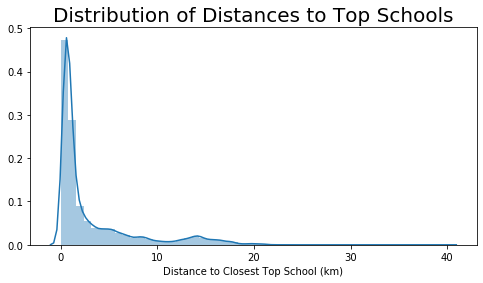

In [37]:
plt.figure(figsize=(8,4))
sns.distplot(df['closest_distance_to_top_school'])
plt.title("Distribution of Distances to Top Schools", fontsize=20)
plt.xlabel('Distance to Closest Top School (km)');
print("Skewness:", df['closest_distance_to_top_school'].skew())
print("Kurtosis:", df['closest_distance_to_top_school'].kurt())

In [38]:
# removing zeroes for log transformation
df.loc[df['closest_distance_to_top_school']==0.00, 'closest_distance_to_top_school']=0.01
#natural log transformation for 'closest_distance_to_top_school'.
df['log_school'] = df['closest_distance_to_top_school'].map(lambda x: np.log(x))

Skewness: 0.31498656015781384
Kurtosis: -0.4837932278849535


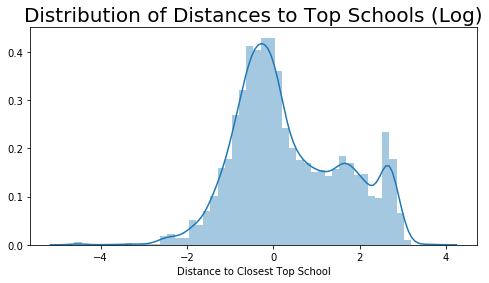

In [39]:
plt.figure(figsize=(8,4))
sns.distplot(df['log_school'])
plt.title("Distribution of Distances to Top Schools (Log)", fontsize=20)
plt.xlabel('Distance to Closest Top School');
print("Skewness:", df['log_school'].skew())
print("Kurtosis:", df['log_school'].kurt())

Skewness: 0.5463096986202912
Kurtosis: 0.8549832443796928


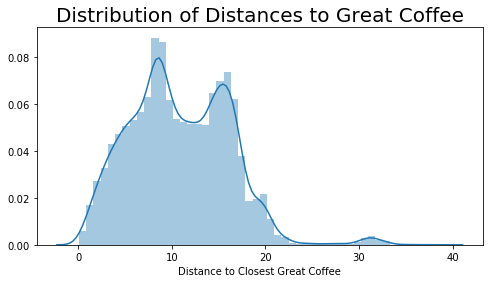

In [40]:
plt.figure(figsize=(8,4))
sns.distplot(df['closest_distance_to_great_coffee'])
plt.title("Distribution of Distances to Great Coffee", fontsize=20)
plt.xlabel('Distance to Closest Great Coffee');
print("Skewness:", df['closest_distance_to_great_coffee'].skew())
print("Kurtosis:", df['closest_distance_to_great_coffee'].kurt())

In [41]:
# removing zeroes for log transformation
df.loc[df['closest_distance_to_great_coffee']==0.00, 'closest_distance_to_top_school']=0.01
#natural log transformation for 'closest_distance_to_great_coffee'.
df['log_coffee'] = df['closest_distance_to_great_coffee'].map(lambda x: np.log(x))

Skewness: -1.3133207595110006
Kurtosis: 2.7702815633450766


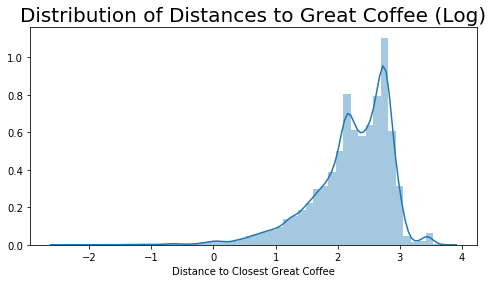

In [42]:
plt.figure(figsize=(8,4))
sns.distplot(df['log_coffee'])
plt.title("Distribution of Distances to Great Coffee (Log)", fontsize=20)
plt.xlabel('Distance to Closest Great Coffee');
print("Skewness:", df['log_coffee'].skew())
print("Kurtosis:", df['log_coffee'].kurt())

Skewness: 0.729624297126709
Kurtosis: -0.13070775209001573


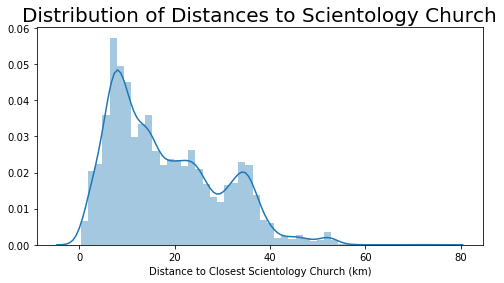

In [43]:
plt.figure(figsize=(8,4))
sns.distplot(df['closest_distance_to_scientology'])
plt.title("Distribution of Distances to Scientology Church", fontsize=20)
plt.xlabel('Distance to Closest Scientology Church (km)');
print("Skewness:", df['closest_distance_to_scientology'].skew())
print("Kurtosis:", df['closest_distance_to_scientology'].kurt())

In [44]:
# removing zeroes for log transformation
df.loc[df['closest_distance_to_scientology']==0.00, 'closest_distance_to_scientology']=0.01
#natural log transformation for 'closest_distance_to_scientology'.
df['log_scientology'] = df['closest_distance_to_scientology'].map(lambda x: np.log(x))

Skewness: -0.6186336629179573
Kurtosis: 0.16752897590293658


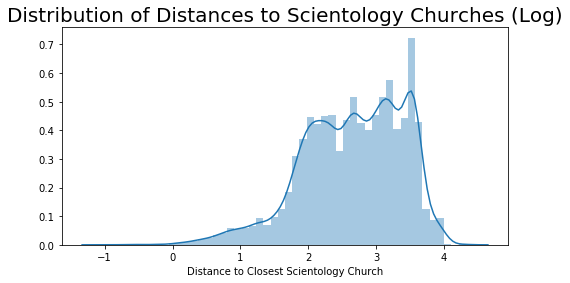

In [45]:
plt.figure(figsize=(8,4))
sns.distplot(df['log_scientology'])
plt.title("Distribution of Distances to Scientology Churches (Log)", fontsize=20)
plt.xlabel('Distance to Closest Scientology Church');
print("Skewness:", df['log_scientology'].skew())
print("Kurtosis:", df['log_scientology'].kurt())

Skewness: 1.205427367383708
Kurtosis: 3.9928978255283716


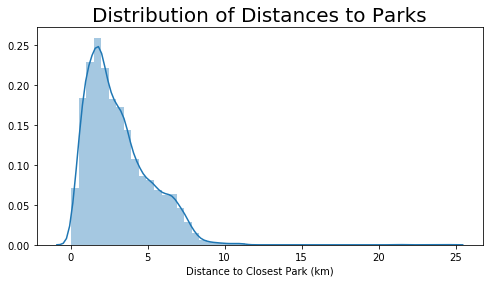

In [46]:
plt.figure(figsize=(8,4))
sns.distplot(df['min_dist_park'])
plt.title("Distribution of Distances to Parks", fontsize=20)
plt.xlabel('Distance to Closest Park (km)');
print("Skewness:", df['min_dist_park'].skew())
print("Kurtosis:", df['min_dist_park'].kurt())

In [47]:
# removing zeroes for log transformation
df.loc[df['min_dist_park']==0.00, 'min_dist_park']=0.01
#natural log transformation for 'min_dist_park'.
df['log_park'] = df['min_dist_park'].map(lambda x: np.log(x))

Skewness: -0.697074959578087
Kurtosis: 0.6535881306866189


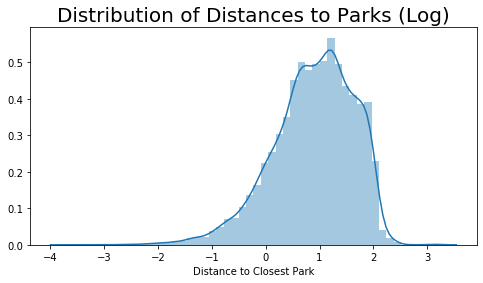

In [48]:
plt.figure(figsize=(8,4))
sns.distplot(df['log_park'])
plt.title("Distribution of Distances to Parks (Log)", fontsize=20)
plt.xlabel('Distance to Closest Park');
print("Skewness:", df['log_park'].skew())
print("Kurtosis:", df['log_park'].kurt())

In [49]:
df.isnull().sum()

price                                  0
sqft_living                            0
grade                                  0
lat                                    0
long                                   0
min_dist_park                       2712
closest_distance_to_top_school         0
closest_distance_to_great_coffee       0
closest_distance_to_scientology        0
log_school                             0
log_coffee                             0
log_scientology                        0
log_park                            2712
dtype: int64

In [50]:
df.dropna(inplace=True)
df.isnull().sum()

price                               0
sqft_living                         0
grade                               0
lat                                 0
long                                0
min_dist_park                       0
closest_distance_to_top_school      0
closest_distance_to_great_coffee    0
closest_distance_to_scientology     0
log_school                          0
log_coffee                          0
log_scientology                     0
log_park                            0
dtype: int64

In [51]:
# saving copy of DataFrame as csv file
#df.to_csv('./data/all_features_with_logs.csv')

### Quantile Tranformation

Skewness: 0.7554175937501574
Kurtosis: -0.04297248665931219


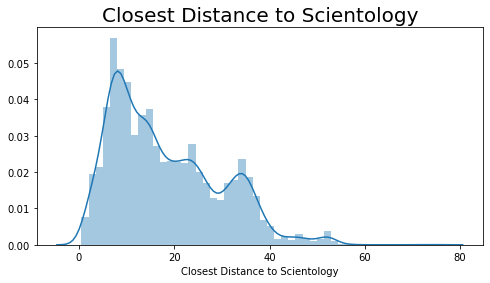

In [54]:
plt.figure(figsize=(8,4))
sns.distplot(df['closest_distance_to_scientology'])
plt.title("Closest Distance to Scientology", fontsize=20)
plt.xlabel('Closest Distance to Scientology');
print("Skewness:", df['closest_distance_to_scientology'].skew())
print("Kurtosis:", df['closest_distance_to_scientology'].kurt())

In [55]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
to_transform= ['sqft_living', 'closest_distance_to_great_coffee', 'min_dist_park', 'closest_distance_to_top_school', 'closest_distance_to_scientology', 'price']
df[to_transform] = qt.fit_transform(df[to_transform])

Skewness: 0.003628284074277272
Kurtosis: 0.04166152893410047


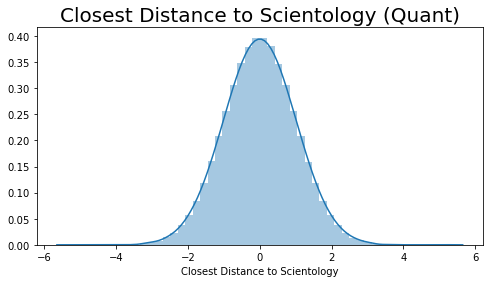

In [56]:
plt.figure(figsize=(8,4))
sns.distplot(df['closest_distance_to_scientology'])
plt.title("Closest Distance to Scientology (Quant)", fontsize=20)
plt.xlabel('Closest Distance to Scientology');
print("Skewness:", df['closest_distance_to_scientology'].skew())
print("Kurtosis:", df['closest_distance_to_scientology'].kurt())

Skewness: -0.0020929964852480346
Kurtosis: 0.023398255870954454


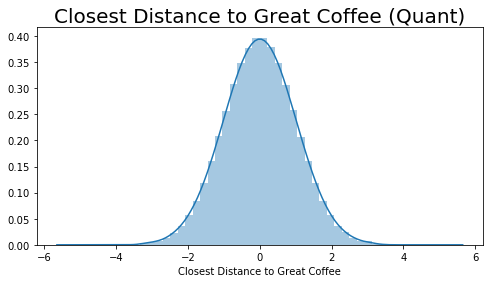

In [57]:
plt.figure(figsize=(8,4))
sns.distplot(df['closest_distance_to_great_coffee'])
plt.title("Closest Distance to Great Coffee (Quant)", fontsize=20)
plt.xlabel('Closest Distance to Great Coffee');
print("Skewness:", df['closest_distance_to_great_coffee'].skew())
print("Kurtosis:", df['closest_distance_to_great_coffee'].kurt())

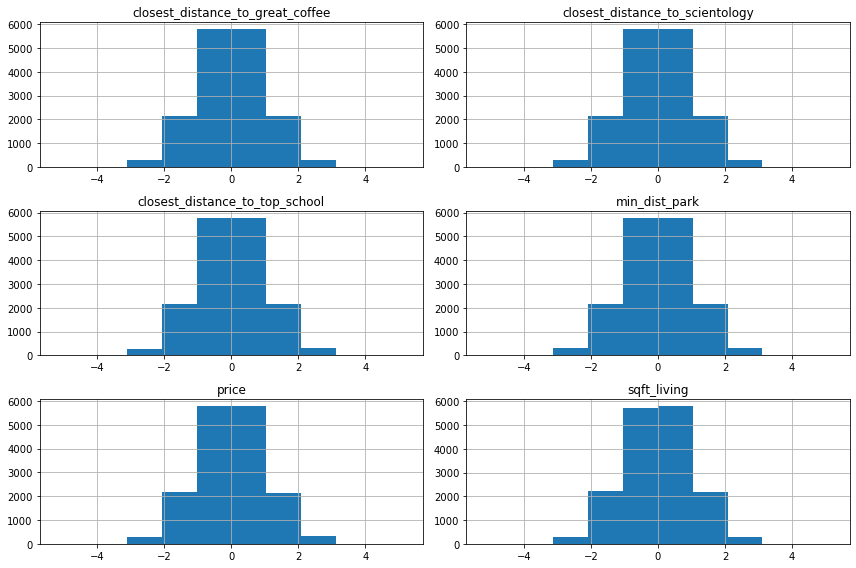

In [58]:
df[['sqft_living', 'closest_distance_to_great_coffee', 'min_dist_park', 'closest_distance_to_top_school', 'closest_distance_to_scientology', 'price']].hist(figsize=(12, 8))
plt.tight_layout();

In [59]:
grade_dums = pd.get_dummies(df.grade, prefix='grade', drop_first=True)

In [60]:
df = df.drop(['grade'], axis=1)
df = pd.concat([df, grade_dums], axis=1)
df.head()

,price,sqft_living,lat,long,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,log_school,log_coffee,...,log_park,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12
0,-1.60,-1.08,47.51,-122.26,-0.31,-1.61,-0.36,-0.24,-1.34,2.13,...,0.71,0,0,0,1,0,0,0,0,0
1,0.49,0.94,47.72,-122.32,0.92,-0.50,0.65,-0.40,-0.38,2.70,...,1.62,0,0,0,1,0,0,0,0,0
2,-2.54,-2.14,47.74,-122.23,-0.84,0.36,0.05,-0.39,0.69,2.36,...,0.29,0,0,1,0,0,0,0,0,0
3,0.78,0.17,47.52,-122.39,-0.08,0.30,0.89,-0.33,0.55,2.76,...,0.90,0,0,0,1,0,0,0,0,0
4,0.37,-0.22,47.62,-122.05,0.02,0.08,-0.32,0.37,0.16,2.15,...,0.98,0,0,0,0,1,0,0,0,0


In [61]:
df['interaction'] = df['closest_distance_to_top_school'] * df['closest_distance_to_scientology']
features = ['sqft_living', 'closest_distance_to_great_coffee', 'min_dist_park', 'closest_distance_to_top_school', 'closest_distance_to_scientology', 'interaction', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11']
target = ['price']
X = df[features]
y = df[target]

# running an iteration of the model with interaction column and using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

lm9 = LinearRegression().fit(X_train, y_train)
lm9_preds = lm9.predict(X_test)

print('R^2: ', r2_score(y_test, lm9_preds))

R^2:  0.6336201486861495


By quantile tranforming our data to achieve a more normal distribution, we are able to achieve a higher R2 score.

In [62]:
# saving copy of dataframe as csv file
#df.to_csv('./data/all_features_quant_transformed.csv')

## Price Per Square Foot  

While we were happy with the increasing R2 score, we wanted to experiment with a new possibility: making a predictive model for price per square foot, as opposed to just price. By honing on in on this target, our goal was to more accurately predict the value of a home based on our features.

In [63]:
# reading the csv file
df = pd.read_csv('data/kc_house_data.csv')
# previewing the DataFrame
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [65]:
# creating price per sqft column
df['price_per_sqft'] = (df['price'] / df['sqft_living'])
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_per_sqft
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650,188.05
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639,209.34
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062,233.77
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000,308.16
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503,303.57


In [66]:
df.price_per_sqft.describe()

count   21597.00
mean      264.14
std       110.00
min        87.59
25%       182.29
50%       244.64
75%       318.33
max       810.14
Name: price_per_sqft, dtype: float64

Skewness: 1.2469211620378835
Kurtosis: 2.0993152010383684


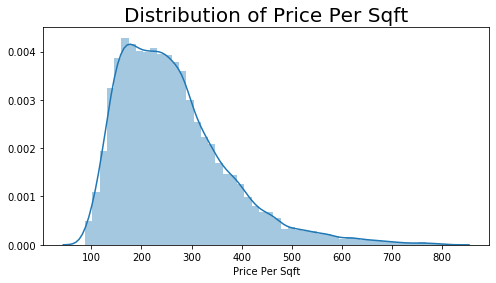

In [67]:
plt.figure(figsize=(8,4))
sns.distplot(df['price_per_sqft'])
plt.title("Distribution of Price Per Sqft", fontsize=20)
plt.xlabel('Price Per Sqft');
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurt())

### Narrowing down our data

We opted to use price per square foot as the factor by which to narrow our data. We removed outliers and focused on our main data by filtering for data within 1.5 standard deviations from the mean for price per square foot. 

In [68]:
# finding the data that lies within 1.5 standard deviations from the mean
std = df.price_per_sqft.std()
print('std: ',std)
mean = df.price_per_sqft.mean()
print('mean: ', mean)
std_1 = mean + std
std_1m = mean - std
std_15 = mean + (1.5*std)
std_15m = mean - (1.5*std)
print('mean +1 std: ',std_1)
print('mean -1 std: ',std_1m)
print('mean +1.5 std: ',std_15)
print('mean -1.5 std: ',std_15m)

std:  110.00006067814525
mean:  264.1433683790251
mean +1 std:  374.14342905717035
mean -1 std:  154.14330770087986
mean +1.5 std:  429.143459396243
mean -1.5 std:  99.14327736180724


In [69]:
std = df.price_per_sqft.std()
mean = df.price_per_sqft.mean()
std_1 = mean + std
std_1m = mean - std
std_15 = mean + (1.5*std)
std_15m = mean - (1.5*std)
# removing outliers
# focusing on data within 1.5 standard deviations from the mean
df = df.loc[(df['price_per_sqft']<std_15) & (df['price_per_sqft']>std_15m)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19785 entries, 0 to 21596
Data columns (total 22 columns):
id                19785 non-null int64
date              19785 non-null object
price             19785 non-null float64
bedrooms          19785 non-null int64
bathrooms         19785 non-null float64
sqft_living       19785 non-null int64
sqft_lot          19785 non-null int64
floors            19785 non-null float64
waterfront        17586 non-null float64
view              19728 non-null float64
condition         19785 non-null int64
grade             19785 non-null int64
sqft_above        19785 non-null int64
sqft_basement     19785 non-null object
yr_built          19785 non-null int64
yr_renovated      16312 non-null float64
zipcode           19785 non-null int64
lat               19785 non-null float64
long              19785 non-null float64
sqft_living15     19785 non-null int64
sqft_lot15        19785 non-null int64
price_per_sqft    19785 non-null float64
dtypes: float

Skewness: 0.37133132146882725
Kurtosis: -0.6982023030383484


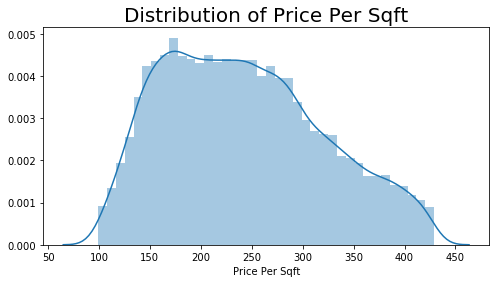

In [70]:
plt.figure(figsize=(8,4))
sns.distplot(df['price_per_sqft'])
plt.title("Distribution of Price Per Sqft", fontsize=20)
plt.xlabel('Price Per Sqft');
print("Skewness:", df['price_per_sqft'].skew())
print("Kurtosis:", df['price_per_sqft'].kurt())

In [71]:
#dropping unnecessary columns
drop = ['id','date', 'yr_built', 'bedrooms', 'bathrooms','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15']
df = df.drop(columns = drop, axis=1)

In [72]:
df.columns

Index(['price', 'sqft_living', 'grade', 'lat', 'long', 'price_per_sqft'], dtype='object')

In [73]:
df.isnull().sum()

price             0
sqft_living       0
grade             0
lat               0
long              0
price_per_sqft    0
dtype: int64

Now that we had all new parameters, we needed to pull in the data again so that it was filtered for outliers based on our new target variable, price per square foot.

### King County Parks

In [74]:
# importing park data REVISED 
# now including only parks (removing forests, natural areas, and trail heads)
# for entire data scraping process, please see other notebook

# reading the csv file
king_parks = pd.read_csv('data/ParkAddresses_Revised_wLatLong.csv', index_col='ID')
# previewing the DataFrame
king_parks.head()

,Name,Address,Combined,Lat,Long
ID,,,,,
0,NaN,NaN,NaN,nan,nan
1,NaN,NaN,NaN,nan,nan
2,NaN,NaN,NaN,nan,nan
3,Big Finn Hill Park,NE 138th and Juanita Drive NE Kirkland WA 98028,"47.72417796430824, -122.2384511052857",47.72,-122.24
4,NaN,NaN,NaN,nan,nan


In [75]:
king_parks.isnull().sum()

Name         85
Address      85
Combined     85
Lat          85
Long         85
dtype: int64

In [76]:
king_parks.dropna(inplace=True)

In [77]:
#create function to find distances between all points in DF and return matrix
def find_distance(dataframe):
    """ 
    Calculates distance between points of interest and houses.
  
    Generates a distance matrix for distances between houses and points of interest.
    Calculates distance from each point in dataframe (df) to point of interest.
    Converts latitude and longitude to radians in order to calculate distance.
    Returns values as kilometers.
  
    Parameters: 
    dataframe (Pandas DataFrame object): user input name of Pandas DataFrame.
  
    Returns: 
    Matrix of distances. 
    
    """
    dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
    
    #convert lat and long to radians
    dataframe[['lat_radians','long_radians']] = (np.radians(dataframe.loc[:,['Lat','Long']]))
    
    #create list matrix (results in km)          
    dist_matrix = (dist.pairwise
    (df[['lat_radians_A','long_radians_A']],
     dataframe[['lat_radians','long_radians']])*6371)
                                                 
    #return a matrix DataFrame
    return pd.DataFrame(dist_matrix)  

In [78]:
#convert lat and long to radians in housing data
df[['lat_radians_A','long_radians_A']] = (np.radians(df.loc[:,['lat','long']]))

In [79]:
park_matrix = find_distance(king_parks)

In [80]:
#find min distance in each row
park_min_matrix = park_matrix.where(park_matrix.values == park_matrix.min(
    axis=1)[:,None]).drop_duplicates()

In [81]:
#create a new column with only min distance and remove the rest 
park_min_matrix['min_dist_park'] = park_min_matrix[park_min_matrix.columns[0:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)
nearest_park = park_min_matrix['min_dist_park']

In [82]:
df = df.join(nearest_park)

In [83]:
df.head()

,price,sqft_living,grade,lat,long,price_per_sqft,lat_radians_A,long_radians_A,min_dist_park
0,221900.00,1180,7,47.51,-122.26,188.05,0.83,-2.13,2.038307293948517
1,538000.00,2570,7,47.72,-122.32,209.34,0.83,-2.13,5.6653668000626025
2,180000.00,770,6,47.74,-122.23,233.77,0.83,-2.13,1.337990461344532
3,604000.00,1960,7,47.52,-122.39,308.16,0.83,-2.14,2.448557143643891
4,510000.00,1680,8,47.62,-122.05,303.57,0.83,-2.13,3.723027946782503


In [84]:
df['min_dist_park']= df['min_dist_park'].astype('float64')

### King County Top Schools

In [85]:
# importing school data
# for entire data obtaining process, please see other notebook

# reading the csv file
top_schools_df = pd.read_csv('data/top_schools.csv')
# previewing the DataFrame
top_schools_df.head()

,Unnamed: 0,year,ncessch,school_name,state_name,lea_name,zip_location,latitude,longitude,county_code,school_level,school_type
0,43,2015,530039000058,Ardmore Elementary School,Washington,Bellevue School District,98008,47.64,-122.12,53033.00,Primary,Regular school
1,44,2015,530039000060,Bellevue High School,Washington,Bellevue School District,98004,47.60,-122.20,53033.00,High,Regular school
2,45,2015,530039000062,Bennett Elementary School,Washington,Bellevue School District,98008,47.62,-122.10,53033.00,Primary,Regular school
3,46,2015,530039000063,Cherry Crest Elementary School,Washington,Bellevue School District,98005,47.64,-122.17,53033.00,Primary,Regular school
4,47,2015,530039000064,Chinook Middle School,Washington,Bellevue School District,98004,47.63,-122.21,53033.00,Middle,Regular school


In [86]:
top_schools_df.drop(columns = 'Unnamed: 0', axis=1, inplace=True)

In [87]:
top_schools_df.head()

,year,ncessch,school_name,state_name,lea_name,zip_location,latitude,longitude,county_code,school_level,school_type
0,2015,530039000058,Ardmore Elementary School,Washington,Bellevue School District,98008,47.64,-122.12,53033.00,Primary,Regular school
1,2015,530039000060,Bellevue High School,Washington,Bellevue School District,98004,47.60,-122.20,53033.00,High,Regular school
2,2015,530039000062,Bennett Elementary School,Washington,Bellevue School District,98008,47.62,-122.10,53033.00,Primary,Regular school
3,2015,530039000063,Cherry Crest Elementary School,Washington,Bellevue School District,98005,47.64,-122.17,53033.00,Primary,Regular school
4,2015,530039000064,Chinook Middle School,Washington,Bellevue School District,98004,47.63,-122.21,53033.00,Middle,Regular school


In [88]:
top_school_coordinates = []
x = round(top_schools_df.latitude, 2)
y = round(top_schools_df.longitude, 2)
top_school_coordinates = list(zip(x,y))

In [89]:
for i in range(len(top_school_coordinates)):
    df[f'top_school_{i}'] = distance_to(top_school_coordinates[i])

top_school_cols = []
for i in range(len(top_school_coordinates)):
    top_school_cols.append(f'top_school_{i}')
    df['closest_distance_to_top_school'] = df[top_school_cols].min(axis=1)

In [90]:
df.drop(columns = top_school_cols, axis=1, inplace=True)
rad_cols = ['lat_radians_A', 'long_radians_A']
df.drop(columns=rad_cols, axis=1, inplace=True)
df.head()

,price,sqft_living,grade,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school
0,221900.00,1180,7,47.51,-122.26,188.05,2.04,0.26
1,538000.00,2570,7,47.72,-122.32,209.34,5.67,0.68
2,180000.00,770,6,47.74,-122.23,233.77,1.34,2.00
3,604000.00,1960,7,47.52,-122.39,308.16,2.45,1.73
4,510000.00,1680,8,47.62,-122.05,303.57,3.72,1.18


### King County Top 10 Coffee Shops

In [91]:
def get_keys(path):
    """Retrieves API key from files as api_key."""
    with open(path) as f:
        return json.load(f)

keys = get_keys("/Users/dtunnicliffe/.secret/yelp_api.json")
api_key = keys['api_key']

term = 'coffee'
location = 'King County, WA'
SEARCH_LIMIT = 10
espresso = pd.DataFrame([])
def yelp(term, location, SEARCH_LIMIT):
    """ 
    Creates a new dataframe of information retrieved from yelp API query.
  
    Searches businesses and returns top results based on criteria provided.
    Makes API call as if searching on yelp.
    Returns relevant information for businesses such as name, location, price range, and rating out of 5 stars.
  
    Parameters: 
    term (str): user input term to search for.
    location (str): user input city, state, or zip code to search within.
    SEARCH_LIMIT (int): user input number of results to return.
  
    Returns: 
    New dataframe populated with requested information. 
    
    """
    global espresso
    url = 'https://api.yelp.com/v3/businesses/search'
    headers = {
    'Authorization': f'Bearer {api_key}',
    }
    url_params = {
    'term': term.replace(' ', '+'),
    'location': location.replace(' ', '+'),
    'limit': SEARCH_LIMIT,
    'sort_by': 'rating'
    }
    response = requests.get(url, headers=headers, params=url_params)
    df_temp = pd.DataFrame.from_dict(response.json()['businesses'])
    espresso = espresso.append(df_temp)
    return espresso

In [92]:
espresso = yelp(term, location, SEARCH_LIMIT)

In [93]:
espresso.head()

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,S6CXIQ5KrMpTPZf1eNMa2w,five-stones-coffee-company-redmond,Five Stones Coffee Company,https://s3-media3.fl.yelpcdn.com/bphoto/OmzSO6...,False,https://www.yelp.com/biz/five-stones-coffee-co...,415,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",4.50,"{'latitude': 47.67583, 'longitude': -122.12471}",[delivery],$$,"{'address1': '8102 161st Ave NE', 'address2': ...",+14252420099,(425) 242-0099,37007.96
1,v7xfqk9f7N8A98AQ2kddWg,anchorhead-coffee-bellevue-3,Anchorhead Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/ErNP7S...,False,https://www.yelp.com/biz/anchorhead-coffee-bel...,70,"[{'alias': 'coffeeroasteries', 'title': 'Coffe...",4.50,"{'latitude': 47.61509, 'longitude': -122.194026}",[delivery],NaN,"{'address1': '555 110th Ave NE', 'address2': '...",,,36458.00
2,t2DOOFh-oJLddtpxbVlDrQ,huxdotter-coffee-north-bend,Huxdotter Coffee,https://s3-media3.fl.yelpcdn.com/bphoto/MdLMtc...,False,https://www.yelp.com/biz/huxdotter-coffee-nort...,83,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",4.50,"{'latitude': 47.493445, 'longitude': -121.787556}",[],$,"{'address1': '101 W Park St', 'address2': 'Ste...",,,7198.39
3,-MzbuOLr2kAoqlQY8w7ECA,pioneer-coffee-north-bend-north-bend,Pioneer Coffee - North Bend,https://s3-media3.fl.yelpcdn.com/bphoto/5SpY3i...,False,https://www.yelp.com/biz/pioneer-coffee-north-...,75,"[{'alias': 'coffeeroasteries', 'title': 'Coffe...",4.50,"{'latitude': 47.4956976441376, 'longitude': -1...",[],$,"{'address1': '202 W North Bend Way', 'address2...",+14252920957,(425) 292-0957,7452.31
4,oUk6IZAFQ37R5OK0etWocg,the-north-bend-bakery-north-bend,The North Bend Bakery,https://s3-media1.fl.yelpcdn.com/bphoto/weMpOC...,False,https://www.yelp.com/biz/the-north-bend-bakery...,158,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",4.00,"{'latitude': 47.4950561, 'longitude': -121.786...",[],$,"{'address1': '127 W N Bend Way', 'address2': '...",+14258880632,(425) 888-0632,7384.63


In [94]:
great_coffee_coordinates = []
x = [round(coordinate['latitude'], 2) for coordinate in espresso['coordinates']]
y = [round(coordinate['longitude'], 2) for coordinate in espresso['coordinates']]
great_coffee_coordinates = list(zip(x,y))

In [95]:
for i in range(len(great_coffee_coordinates)):
    df[f'great_coffee_{i}'] = distance_to(great_coffee_coordinates[i])

great_coffee_cols = []
for i in range(len(great_coffee_coordinates)):
    great_coffee_cols.append(f'great_coffee_{i}')
    df['closest_distance_to_great_coffee'] = df[great_coffee_cols].min(axis=1)

In [96]:
#dropping unnecessary columns
df = df.drop(columns = great_coffee_cols, axis=1)
df.head()

,price,sqft_living,grade,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee
0,221900.00,1180,7,47.51,-122.26,188.05,2.04,0.26,8.39
1,538000.00,2570,7,47.72,-122.32,209.34,5.67,0.68,14.81
2,180000.00,770,6,47.74,-122.23,233.77,1.34,2.00,10.63
3,604000.00,1960,7,47.52,-122.39,308.16,2.45,1.73,15.80
4,510000.00,1680,8,47.62,-122.05,303.57,3.72,1.18,8.55


### King County Churches of Scientology

In [97]:
#locations pulled from scientology-seattle.org
church_of_scientology_mission = (47.818100, -122.315430)
church_of_scientology_washington = (47.622380, -122.361020)
church_of_scientology_life_improvement_center = (47.615060, -122.327580)

In [98]:
#creating new columns of distances from houses to point of interest
df['distance_to_scientology_m'] = distance_to(church_of_scientology_mission)
df['distance_to_scientology_w'] = distance_to(church_of_scientology_washington)
df['distance_to_scientology_l'] = distance_to(church_of_scientology_life_improvement_center)
df['closest_distance_to_scientology'] = df[['distance_to_scientology_m',
                                                        'distance_to_scientology_w',
                                                        'distance_to_scientology_l']].min(axis=1)

In [99]:
sci_cols = ['distance_to_scientology_m', 'distance_to_scientology_w',
           'distance_to_scientology_l']
df.drop(columns = sci_cols, axis=1, inplace=True)

In [100]:
df.head()

,price,sqft_living,grade,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology
0,221900.00,1180,7,47.51,-122.26,188.05,2.04,0.26,8.39,12.71
1,538000.00,2570,7,47.72,-122.32,209.34,5.67,0.68,14.81,10.80
2,180000.00,770,6,47.74,-122.23,233.77,1.34,2.00,10.63,10.84
3,604000.00,1960,7,47.52,-122.39,308.16,2.45,1.73,15.80,11.55
4,510000.00,1680,8,47.62,-122.05,303.57,3.72,1.18,8.55,21.18


### Quantile Transformation

In [101]:
df.isnull().sum()

price                                  0
sqft_living                            0
grade                                  0
lat                                    0
long                                   0
price_per_sqft                         0
min_dist_park                       2290
closest_distance_to_top_school         0
closest_distance_to_great_coffee       0
closest_distance_to_scientology        0
dtype: int64

In [102]:
df.dropna(inplace=True)

In [103]:
df.corr()

,price,sqft_living,grade,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology
price,1.00,0.76,0.71,0.37,0.07,0.52,-0.01,-0.35,-0.22,-0.30
sqft_living,0.76,1.00,0.76,0.08,0.22,-0.10,-0.00,-0.09,-0.17,0.04
grade,0.71,0.76,1.00,0.11,0.22,0.12,-0.01,-0.10,-0.19,0.03
lat,0.37,0.08,0.11,1.00,-0.10,0.54,-0.01,-0.66,-0.18,-0.72
long,0.07,0.22,0.22,-0.10,1.00,-0.18,-0.01,0.01,-0.38,0.63
price_per_sqft,0.52,-0.10,0.12,0.54,-0.18,1.00,-0.00,-0.50,-0.10,-0.55
min_dist_park,-0.01,-0.00,-0.01,-0.01,-0.01,-0.00,1.00,0.01,-0.01,-0.00
closest_distance_to_top_school,-0.35,-0.09,-0.10,-0.66,0.01,-0.50,0.01,1.00,0.34,0.66
closest_distance_to_great_coffee,-0.22,-0.17,-0.19,-0.18,-0.38,-0.10,-0.01,0.34,1.00,0.11
closest_distance_to_scientology,-0.30,0.04,0.03,-0.72,0.63,-0.55,-0.00,0.66,0.11,1.00


Since closest distance to top school and closest distance to scientology have multicolinearity, creating 'interaction' column to account for this relationship.

In [104]:
df['interaction'] = df['closest_distance_to_top_school'] * df['closest_distance_to_scientology']
df.head()

,price,sqft_living,grade,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,interaction
0,221900.00,1180,7,47.51,-122.26,188.05,2.04,0.26,8.39,12.71,3.33
1,538000.00,2570,7,47.72,-122.32,209.34,5.67,0.68,14.81,10.80,7.37
2,180000.00,770,6,47.74,-122.23,233.77,1.34,2.00,10.63,10.84,21.71
3,604000.00,1960,7,47.52,-122.39,308.16,2.45,1.73,15.80,11.55,19.97
4,510000.00,1680,8,47.62,-122.05,303.57,3.72,1.18,8.55,21.18,24.98


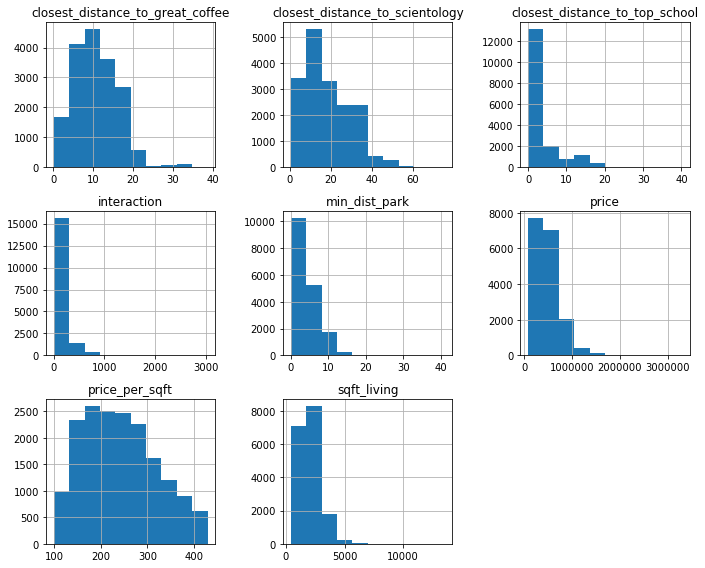

In [105]:
df[['price_per_sqft', 'sqft_living', 'closest_distance_to_great_coffee', 'min_dist_park', 'closest_distance_to_top_school', 'closest_distance_to_scientology', 'price', 'interaction']].hist(figsize=(10,8))
plt.tight_layout();

Our features and target do not illustrate normal distrubtions.

In [106]:
# quantile-transforming our features and target
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(output_distribution='normal')
df['quant_sqft_living'] = qt.fit_transform(df[['sqft_living']])
df['quant_coffee'] = qt.fit_transform(df[['closest_distance_to_great_coffee']])
df['quant_parks'] = qt.fit_transform(df[['min_dist_park']])
df['quant_schools'] = qt.fit_transform(df[['closest_distance_to_top_school']])
df['quant_scientology'] = qt.fit_transform(df[['closest_distance_to_scientology']])
df['quant_price'] = qt.fit_transform(df[['price']])
df['quant_price_per_sqft'] = qt.fit_transform(df[['price_per_sqft']])
df['quant_interaction'] = qt.fit_transform(df[['interaction']])

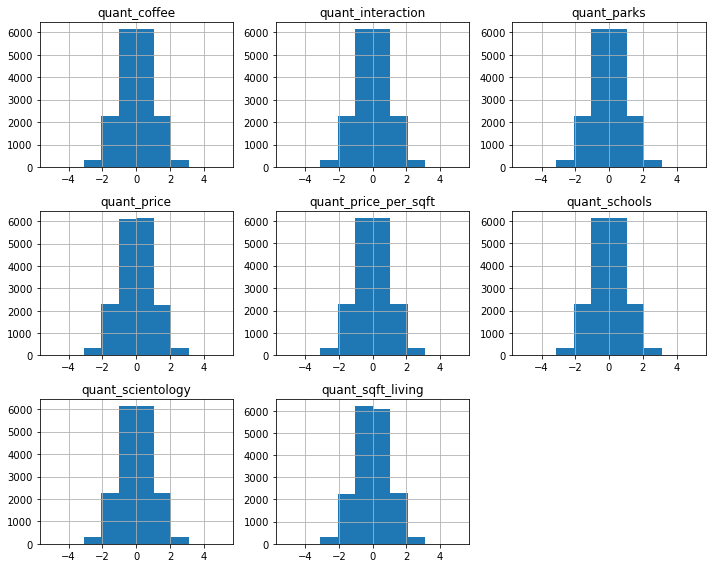

In [107]:
df[['quant_sqft_living', 'quant_coffee', 'quant_parks', 'quant_schools', 'quant_scientology', 'quant_price', 'quant_price_per_sqft', 'quant_interaction' ]].hist(figsize=(10, 8))
plt.tight_layout();

Our quantile transformation led to a much more normal distribution for our features and target.

In [108]:
grade_dums = pd.get_dummies(df.grade, prefix='grade', drop_first=True)

In [109]:
df = df.drop(['grade'], axis=1)
df = pd.concat([df, grade_dums], axis=1)
df.head()

,price,sqft_living,lat,long,price_per_sqft,min_dist_park,closest_distance_to_top_school,closest_distance_to_great_coffee,closest_distance_to_scientology,interaction,...,quant_interaction,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.00,1180,47.51,-122.26,188.05,2.04,0.26,8.39,12.71,3.33,...,-1.11,0,0,1,0,0,0,0,0,0
1,538000.00,2570,47.72,-122.32,209.34,5.67,0.68,14.81,10.80,7.37,...,-0.50,0,0,1,0,0,0,0,0,0
2,180000.00,770,47.74,-122.23,233.77,1.34,2.00,10.63,10.84,21.71,...,0.08,0,1,0,0,0,0,0,0,0
3,604000.00,1960,47.52,-122.39,308.16,2.45,1.73,15.80,11.55,19.97,...,0.05,0,0,1,0,0,0,0,0,0
4,510000.00,1680,47.62,-122.05,303.57,3.72,1.18,8.55,21.18,24.98,...,0.16,0,0,0,1,0,0,0,0,0


In [110]:
# saving copy of dataframe as csv file
#df.to_csv('./data/all_features_ppsqft_quant.csv')